Информация о вакансиях "Аналитика данных" и "Data Science" в Нижнем Новгороде и Москве с сайта career.habr.com

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
class VacancyScraper:
    def __init__(self, urls, headers):
        self.urls = urls
        self.headers = headers
        self.results = {
            'Intern': {'Vacancies': [], 'Count of vacancies': 0},
            'Junior': {'Vacancies': [], 'Count of vacancies': 0},
            'Middle': {'Vacancies': [], 'Count of vacancies': 0},
            'Senior': {'Vacancies': [], 'Count of vacancies': 0},
            'Lead': {'Vacancies': [], 'Count of vacancies': 0},
            'No level': {'Vacancies': [], 'Count of vacancies': 0}
        }

    def process_vacancies(self):
        for url_template in self.urls:
            page = 1

            while True:
                url = url_template.format(page)
                response = requests.get(url, headers=self.headers)

                if response.status_code == 200:
                    soup = BeautifulSoup(response.text, "html.parser")
                    vacancy_cards = soup.find_all('div', class_='vacancy-card__inner')

                    if not vacancy_cards:
                        break

                    for card in vacancy_cards:
                        name = card.find('div', class_='vacancy-card__title').text
                        skills_info = card.find('div', class_="vacancy-card__skills").text
                        if 'junior' in skills_info.lower():
                            self.results['Junior']['Vacancies'].append(name)
                        elif 'middle' in skills_info.lower():
                            self.results['Middle']['Vacancies'].append(name)
                        elif 'senior' in skills_info.lower():
                            self.results['Senior']['Vacancies'].append(name)
                        elif 'lead' in skills_info.lower():
                            self.results['Lead']['Vacancies'].append(name)
                        elif 'intern' in skills_info.lower():
                            self.results['Intern']['Vacancies'].append(name)
                        else:
                            self.results['No level']['Vacancies'].append(name)

                    page += 1
                else:
                    print("Failed to fetch page:", page)
                    break

        self.update_counts()

    def update_counts(self):
        for key in self.results:
            self.results[key]['Count of vacancies'] = len(self.results[key]['Vacancies'])

In [ ]:
urls = [
    'https://career.habr.com/vacancies?locations[]=c_678&locations[]=c_715&q=%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D1%82%D0%B8%D0%BA%D0%B0%20%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85&type=all&page={}',
    'https://career.habr.com/vacancies?locations[]=c_715&locations[]=c_678&page={}&q=Data%20Science&type=all'
]

In [ ]:
headers = {
    "accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7",
    "accept-encoding": "gzip, deflate, br, zstd",
    "accept-language": "ru-RU,ru;q=0.9,en-US;q=0.8,en;q=0.7",
    "cache-control": "max-age=0",
    "cookie": "mid=Mm9G08OfRIBM4wp0NX9Zeg; _ga=GA1.1.1581026283.1711805326; _fbp=fb.1.1711805326827.870550539; _ym_uid=1711806607403261244; _ym_d=1711806607; habr_uuid=MFhmMEpOcTNaV1FERUdFZjBaTHVub2REcnpoS2hlYmp3Q3J6dTZGK1AzcEJQRUpxd2pCcDFxVHR2a2M0Y3llRA%3D%3D; _ga_S28W1WC23F=GS1.1.1711877744.2.0.1711877744.60.0.1481112756; check_cookies=true; vtype=all; lsb=1000115664; mp_e2d341d0f1fa432ebeafb8f954b334b2_mixpanel=%7B%22distinct_id%22%3A%20%22%24device%3A18e8f8c64334f0-0db2c2b54fad35-26001a51-18c180-18e8f8c64334f0%22%2C%22%24device_id%22%3A%20%2218e8f8c64334f0-0db2c2b54fad35-26001a51-18c180-18e8f8c64334f0%22%2C%22%24search_engine%22%3A%20%22google%22%2C%22%24initial_referrer%22%3A%20%22https%3A%2F%2Fwww.google.com%2F%22%2C%22%24initial_referring_domain%22%3A%20%22www.google.com%22%2C%22__mps%22%3A%20%7B%7D%2C%22__mpso%22%3A%20%7B%22%24initial_referrer%22%3A%20%22https%3A%2F%2Fwww.google.com%2F%22%2C%22%24initial_referring_domain%22%3A%20%22www.google.com%22%7D%2C%22__mpus%22%3A%20%7B%7D%2C%22__mpa%22%3A%20%7B%7D%2C%22__mpu%22%3A%20%7B%7D%2C%22__mpr%22%3A%20%5B%5D%2C%22__mpap%22%3A%20%5B%5D%7D; _career_session=MEdtWGJhNFEwTzFpb0ZhVFNLdWtJYmRQQnc2TGhNSWZtbGM2c2VUQXlUTzZCL2paZnQrTllDVk5jMEpLaXh1ZjBlWWtqUDVHYmpURjdPdW8ra0NZYmc5dTYwU1AzOGhpWXdnUTRlWGZHRFcyOXFoYjlEMkdrRWcyYlkxOHhtUndlQXJIU3FlQXQ1QlRzdzdpT2dTS1NBPT0tLUFKSnlPQno4VElhZ1dmYklEOWdHZUE9PQ%3D%3D--d4a7ede1e29c8f3305092217153ec7b2da7a73b8; _ga_8ZVM81B7DF=GS1.1.1711877781.5.1.1711880123.55.0.1022953413",
    "referer": "https://career.habr.com/",
    "sec-ch-ua": "'Google Chrome';v='123', 'Not:A-Brand';v='8', 'Chromium';v='123'",
    "sec-ch-ua-mobile": "?0",
    "sec-ch-ua-platform": "'Windows'",
    "sec-fetch-dest": "document",
    "sec-fetch-mode": "navigate",
    "sec-fetch-site": "same-origin",
    "sec-fetch-user": "?1",
    "upgrade-insecure-requests": "1",
    "user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/123.0.0.0 Safari/537.36"
}

In [ ]:
scraper = VacancyScraper(urls, headers)
scraper.process_vacancies()

In [ ]:
for key, value in scraper.results.items():
    print(f"{key}: {value['Count of vacancies']}")

Intern: 8
Junior: 10
Middle: 109
Senior: 68
Lead: 22
No level: 39


In [ ]:
df = pd.DataFrame(scraper.results)

In [ ]:
print(f"Вакансии по направлениям 'Аналитика данных' и 'Data Science' в Нижнем Новгороде и Москве:\n")
df

Вакансии по направлениям 'Аналитика данных' и 'Data Science' в Нижнем Новгороде и Москве:



,Intern,Junior,Middle,Senior,Lead,No level
Vacancies,"[Стажер - аналитик, Аналитик BI, Backend-разра...","[Администратор технической поддержки, DevOps (...","[Системный аналитик (речевая аналитика), Разра...",[Руководитель направления (Клиентская аналитик...,"[Ведущий аналитик данных / Начальник отдела, D...","[Аналитик данных, Аналитик-исследователь в ком..."
Count of vacancies,8,10,109,68,22,39


In [ ]:
data = []
for level, vacancy_data in scraper.results.items():
    for vacancy in vacancy_data['Vacancies']:
        data.append({'Level': level, 'Vacancy': vacancy})

df2 = pd.DataFrame(data)
df2

,Level,Vacancy
0,Intern,Стажер - аналитик
1,Intern,Аналитик BI
2,Intern,Backend-разработчик PHP
3,Intern,Системный аналитик / System Analyst Trainee
4,Intern,Бизнес-аналитик 1С
...,...,...
251,No level,Data Engineer в команду рекламных технологий
252,No level,Старший разработчик DWH / data engineer (hadoop)
253,No level,Разработчик (HR Core)
254,No level,Developer C++ (NGFW)


Уберём наименования вакансий, чтобы осталось только количество для каждого уровня

In [ ]:
df_final= df.drop('Vacancies')
print('Информация с количеством вакансий для каждого уровня:\n')
df_final

Информация с количеством вакансий для каждого уровня:



,Intern,Junior,Middle,Senior,Lead,No level
Count of vacancies,8,10,109,68,22,39


Сделаем визуализацию

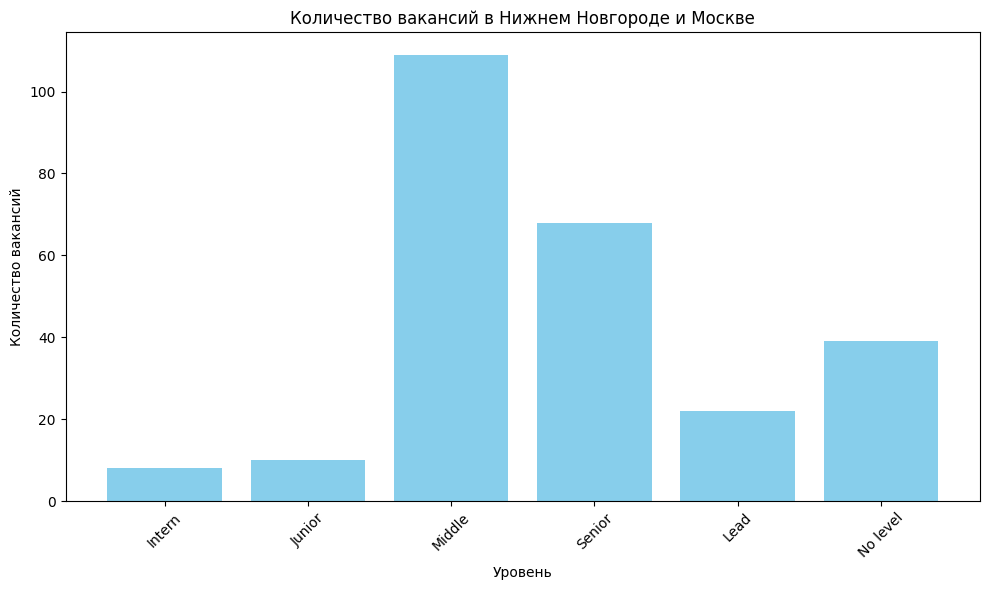

In [ ]:
levels = list(scraper.results.keys())
counts = [value['Count of vacancies'] for value in scraper.results.values()]

plt.figure(figsize=(10, 6))
plt.bar(levels, counts, color='skyblue')
plt.xlabel('Уровень')
plt.ylabel('Количество вакансий')
plt.title('Количество вакансий в Нижнем Новгороде и Москве')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

Можно сделать вывод, что больше всего компаниям нужны Middle-разработчики. Следующее место занимают Senior-разработчики. Напротив, в стажёрах компании нуждаются меньше всего

Выведем все вакансии для каждого уровня

In [ ]:
for level, data in scraper.results.items():
    print(f"{level}:")
    for vacancy in data['Vacancies']:
        print(vacancy)
    print()

Intern:
Стажер - аналитик
Аналитик BI
Backend-разработчик PHP
Системный аналитик / System Analyst Trainee
Бизнес-аналитик 1С
Разработчик 1С 
Разработчик бэкенда в команду международного направления Taxi
Data engineer

Junior:
Администратор технической поддержки
DevOps (Junior+/Middle)/Администратор тестовых сред
Младший системный инженер Linux (Tantor)
Инженер по решениям надежности
Junior Data Engineer
Системный аналитик (Единый семантический слой)
IT-координатор
Junior Developer
Специалист службы технической поддержки 
Junior Data Engineer

Middle:
Системный аналитик (речевая аналитика)
Разработчик БД (баз данных)
Менеджер по качеству данных (SQL)
Разработчик хранилищ данных / DWH
Python Developer в команду сервисов данных Почты
Аналитик данных в команду доставки Маркета
Аналитик данных в группу управления метаданными [Governance]
Инженер данных 
Product owner
Аналитик данных
Инженер данных
Архитектор хранилища данных
Архитектор интеграционной модели данных
Администратор баз данных
А